In [1]:
import uproot
import matplotlib.pyplot as plt
from coffea import hist
from coffea.hist import plot

In [2]:
filename = "fitDiagnosticsTest.root"
flavors = ['b','bb','c','cc','l']
flavor_axis  = hist.Cat("flavor",   "Flavor")
jetproba_axis  = hist.Bin("jetproba",  r"jet Probability", 50, 0, 2.55)
output = {}
for year in ['2017', '2018']:
    for tagger in ['DDB','DDC']:
        for selection in ['sfpass', 'sffail']:
            for fit in ['prefit', 'fit_s']:
                output[f'shape_{fit}_{selection}{tagger}{year}'] = hist.Hist("entries", flavor_axis, jetproba_axis)
output

{'shape_prefit_sfpassDDB2017': <Hist (flavor,jetproba) instance at 0x7fe68d39d6d0>,
 'shape_fit_s_sfpassDDB2017': <Hist (flavor,jetproba) instance at 0x7fe68d39d730>,
 'shape_prefit_sffailDDB2017': <Hist (flavor,jetproba) instance at 0x7fe68d387df0>,
 'shape_fit_s_sffailDDB2017': <Hist (flavor,jetproba) instance at 0x7fe68d387e20>,
 'shape_prefit_sfpassDDC2017': <Hist (flavor,jetproba) instance at 0x7fe68d387e50>,
 'shape_fit_s_sfpassDDC2017': <Hist (flavor,jetproba) instance at 0x7fe68d387eb0>,
 'shape_prefit_sffailDDC2017': <Hist (flavor,jetproba) instance at 0x7fe68d387f10>,
 'shape_fit_s_sffailDDC2017': <Hist (flavor,jetproba) instance at 0x7fe68d387d60>,
 'shape_prefit_sfpassDDB2018': <Hist (flavor,jetproba) instance at 0x7fe68d387b80>,
 'shape_fit_s_sfpassDDB2018': <Hist (flavor,jetproba) instance at 0x7fe68d387b20>,
 'shape_prefit_sffailDDB2018': <Hist (flavor,jetproba) instance at 0x7fe68d387ac0>,
 'shape_fit_s_sffailDDB2018': <Hist (flavor,jetproba) instance at 0x7fe68d387c70>

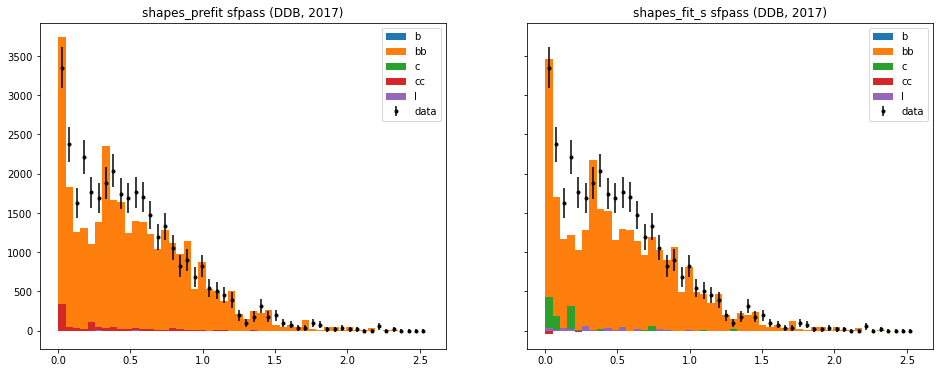

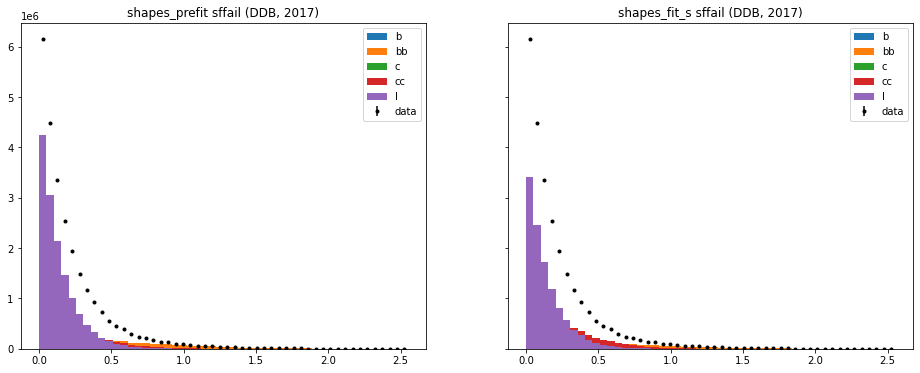

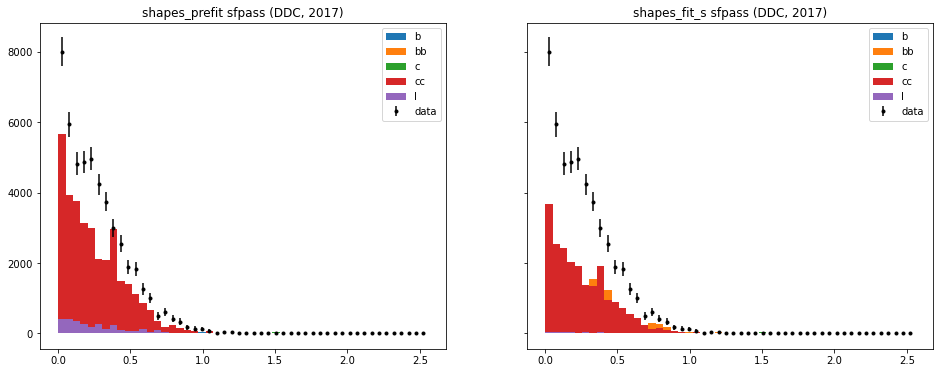

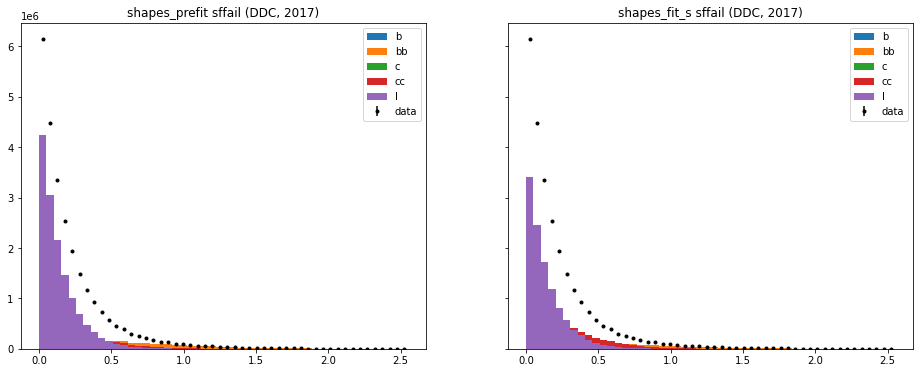

In [19]:
#for year in ['2017', '2018']:
for year in ['2017']:
    for tagger in ['DDB','DDC']:
        fitdir = f'/work/mmarcheg/BTVNanoCommissioning/fitdir/{year}/msd100tau06{tagger}/'
        f = uproot.open(fitdir + filename)
        for selection in ['sfpass', 'sffail']:
            fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)
            #print(axes)
            #fig, (ax1, ax2, rax1, rax2) = plt.subplots(2, 2, figsize=(16,6), sharey=True)
            #fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)
            for i, fit in enumerate(['prefit', 'fit_s']):
                ax = axes[i]
                ax.set_title(f'shapes_{fit} ' + selection + f' ({tagger}, {year})')
                for flavor in flavors:
                    h = f[f'shapes_{fit}/{selection}/{flavor};1']
                    weights, bins = h.to_numpy()
                    binsize = bins[1] - bins[0]
                    values = (bins - 0.5*binsize)[1:]
                    #output[f'shape_{fit}_{selection}{tagger}{year}'].fill(flavor=flavor, jetproba=values, weight=weights)
                    ax.hist(values, bins, weights=weights, stacked=True, label=flavor)
                    
                data = f[f'shapes_{fit}/{selection}/data;1']
                #output[f'shape_{fit}_{selection}{tagger}{year}'].fill(flavor='data', jetproba=data.values()[0], weight=data.values()[1])
                errors = data.errors('mean')[1]
                ax.errorbar(data.values()[0], data.values()[1], yerr=errors, marker='.', linestyle='', color='black', label='data')
                ax.legend(loc='upper right')
                #plot.plotratio(num=output[f'shape_{fit}_{selection}{tagger}{year}']['data'].sum('flavor'), denom=output[f'shape_{fit}_{selection}{tagger}{year}'][flavors].sum('flavor'), ax=axes[i+2],
                       #unc='num')

In [4]:
from coffea.util import load

In [5]:
output = load("/work/mmarcheg/BTVNanoCommissioning/histograms/hists_fattag_pileupJEC_2017_WPcuts_v01.coffea7")

In [6]:
histname='fatjet_jetproba_msd100tau06DDBpassMwp'
h = output[histname]
h['BTagMuB'].sum('flavor').values(sumw2=True)[('BTagMuB',)]

(array([9., 7., 3., 5., 5., 4., 6., 4., 2., 3., 4., 4., 1., 6., 6., 3., 2.,
        4., 0., 2., 2., 0., 3., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([9., 7., 3., 5., 5., 4., 6., 4., 2., 3., 4., 4., 1., 6., 6., 3., 2.,
        4., 0., 2., 2., 0., 3., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [7]:
h['QCD_Pt-300to470_MuEnrichedPt5'].sum('dataset', 'flavor').values()[()]

array([88.19979015, 40.99527654, 32.50362716, 36.76708994, 34.50057054,
       41.54933177, 43.82162163, 35.70990774, 34.84366641, 33.37694743,
       33.63871158, 33.26564462, 28.69554465, 27.54843649, 39.76112768,
       27.50909004, 15.81850301, 20.43513114, 13.12587322, 19.44859478,
        9.20818088, 13.19233791, 11.10538076, 10.15572139,  4.40378365,
        2.67078681,  7.12492888,  5.73724882,  1.9872019 ,  1.02669615,
        0.        ,  2.0937089 ,  0.75061317,  4.1377259 ,  0.        ,
        0.        ,  1.07586848,  1.24323425,  0.        ,  1.57159991,
        0.        ,  0.        ,  1.03923349,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

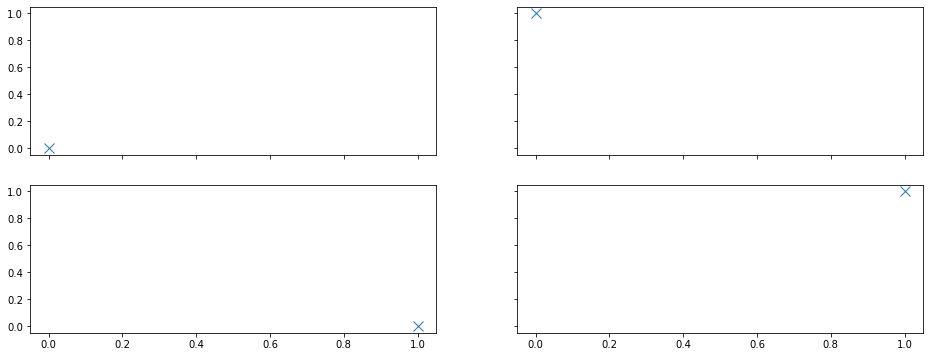

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,6), sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i][j].plot(i, j, marker='x', markersize=10)